In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
from pprint import pprint
from datetime import datetime

# Import API key
#from api_keys import api_key

#my unsecure solution to not being able to grab data from another worksheet
api_key = 'd53a12ca3d62240eafdefe91c64bb21c'

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
   city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

   # If the city is unique, then add it to a our cities list
   if city not in cities:
       cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
#store cities into a dataframe and setting the first column to "City"

cities_df = pd.DataFrame(cities)
cities_df.columns = ["City"]
cities_df.head()

,City
0,bakersfield
1,sorland
2,lebu
3,shaowu
4,puerto madryn


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0

#creating empty lists
data = []
lat = []
long = []
temp = []
humidity = []
cloudiness = []
wind_speed = []


for index,row in cities_df.iterrows():
   count+= 1
   query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['City']


   try:
       weather_response = requests.get(query_url)
       cityweather = weather_response.json()
       data.append(cityweather['dt'])
       lat.append(cityweather['coord']['lat'])
       long.append(cityweather['coord']['lat'])
       temp.append(cityweather['main']['temp'])
       humidity.append(cityweather['main']['humidity'])
       cloudiness.append(cityweather['clouds']['all'])
       wind_speed.append(cityweather['wind']['speed'])

       print("Now retieving city #" + str(count) + " | " + str(row["City"]))
       print(query_url)

   except KeyError:
       print("City not found. Skipping...")

   continue

print('-------------------------------')
print('Data Processing Complete')
print('-------------------------------')

Now retieving city #1 | bakersfield
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=bakersfield
Now retieving city #2 | sorland
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=sorland
Now retieving city #3 | lebu
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=lebu
Now retieving city #4 | shaowu
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=shaowu
Now retieving city #5 | puerto madryn
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=puerto madryn
Now retieving city #6 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=mar del plata
Now retieving city #7 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&un

Now retieving city #62 | marsa matruh
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=marsa matruh
Now retieving city #63 | najran
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=najran
Now retieving city #64 | sinjar
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=sinjar
Now retieving city #65 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=yellowknife
Now retieving city #66 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=barrow
Now retieving city #67 | usinsk
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=usinsk
Now retieving city #68 | hohoe
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imp

Now retieving city #120 | avera
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=avera
City not found. Skipping...
City not found. Skipping...
Now retieving city #123 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=victoria
City not found. Skipping...
City not found. Skipping...
Now retieving city #126 | preston
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=preston
Now retieving city #127 | zolochiv
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=zolochiv
City not found. Skipping...
Now retieving city #129 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=kodiak
Now retieving city #130 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=

Now retieving city #185 | yangjiang
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=yangjiang
Now retieving city #186 | thunder bay
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=thunder bay
Now retieving city #187 | abu samrah
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=abu samrah
Now retieving city #188 | ritchie
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=ritchie
Now retieving city #189 | hirara
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=hirara
Now retieving city #190 | malaya serdoba
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=malaya serdoba
Now retieving city #191 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d622

Now retieving city #244 | gizo
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=gizo
Now retieving city #245 | pathein
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=pathein
Now retieving city #246 | spirovo
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=spirovo
Now retieving city #247 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=meulaboh
City not found. Skipping...
Now retieving city #249 | cap-aux-meules
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=cap-aux-meules
Now retieving city #250 | shakiso
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=shakiso
Now retieving city #251 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=

Now retieving city #304 | mackay
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=mackay
Now retieving city #305 | chapais
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=chapais
Now retieving city #306 | langres
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=langres
Now retieving city #307 | lagunas
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=lagunas
Now retieving city #308 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=aklavik
City not found. Skipping...
Now retieving city #310 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=bathsheba
City not found. Skipping...
Now retieving city #312 | melivoia
http://api.openweathermap.org/data/2.

Now retieving city #370 | bucerias
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=bucerias
Now retieving city #371 | leh
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=leh
Now retieving city #372 | hami
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=hami
Now retieving city #373 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=praia da vitoria
Now retieving city #374 | kobayashi
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=kobayashi
Now retieving city #375 | waynesville
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=waynesville
Now retieving city #376 | tautira
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c

Now retieving city #432 | shache
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=shache
Now retieving city #433 | juybar
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=juybar
Now retieving city #434 | iguape
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=iguape
Now retieving city #435 | vryburg
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=vryburg
Now retieving city #436 | anchorage
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=anchorage
Now retieving city #437 | gannan
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=gannan
Now retieving city #438 | elizabeth city
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=I

City not found. Skipping...
City not found. Skipping...
Now retieving city #496 | sao paulo de olivenca
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=sao paulo de olivenca
Now retieving city #497 | alta gracia
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=alta gracia
Now retieving city #498 | pedernales
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=pedernales
Now retieving city #499 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=tiksi
Now retieving city #500 | diamantino
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=diamantino
Now retieving city #501 | panubigan
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=panubigan
Now retieving city #502 | 

Now retieving city #557 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=lavrentiya
Now retieving city #558 | kandi
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=kandi
Now retieving city #559 | dudinka
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=dudinka
Now retieving city #560 | tessalit
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=tessalit
City not found. Skipping...
Now retieving city #562 | gryfino
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=gryfino
City not found. Skipping...
Now retieving city #564 | xinpu
http://api.openweathermap.org/data/2.5/weather?appid=d53a12ca3d62240eafdefe91c64bb21c&units=Imperial&q=xinpu
City not found. Skipping...
Now retieving city #566 | xichang
http://api.o

In [6]:
weather_data_dict = {'City': city, 'Cloudines': cloudiness, 'Date': data, 
       'Humidity': humidity, 'Lat': lat, 'Lng': long, 'Max Temp':temp,
       'Wind Speed': wind_speed}

weather_data = pd.DataFrame(weather_data_dict)
weather_data.count()

City          546
Cloudines     546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

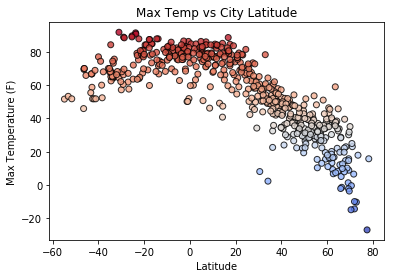

In [7]:
#Plotting the data
plt.scatter(weather_data['Lat'],
           weather_data['Max Temp'],
           
            #Set color to temperature data to signify temperature for each city
           
            c = weather_data['Max Temp'],
            edgecolor = "black", linewidths = 1, marker = "o",
            cmap="coolwarm", alpha = 0.8, label = "City")

plt.title('Max Temp vs City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("temperature.png")

plt.show()

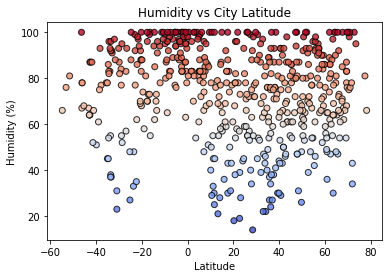

In [8]:
plt.scatter(weather_data['Lat'],
           weather_data['Humidity'],
           
            #Set color to temperature data to signify temperature for each city
           
            c = weather_data['Humidity'],
            edgecolor = "black", linewidths = 1, marker = "o",
            cmap="coolwarm", alpha = 0.8, label = "City" )

plt.title('Humidity vs City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Humidity.png')

plt.show()

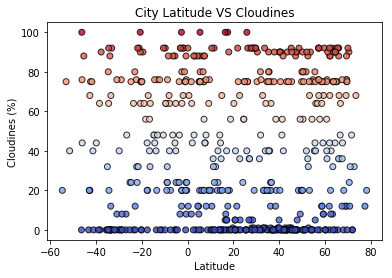

In [9]:
plt.scatter(weather_data['Lat'],
           weather_data['Cloudines'],
           
            #Set color to temperature data to signify temperature for each city
           
            c = weather_data['Cloudines'],
            edgecolor = "black", linewidths = 1, marker = "o",
            cmap="coolwarm", alpha = 0.8, label = "City" )

plt.title('City Latitude VS Cloudines')
plt.xlabel('Latitude')
plt.ylabel('Cloudines (%)')
plt.savefig('Cloudines.png')
plt.show()

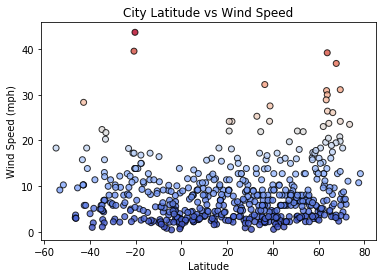

In [10]:
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'],c = weather_data
           ['Wind Speed'], edgecolor = 'black', linewidth = 1, marker = 'o', 
           cmap = 'coolwarm', alpha = .8, label = 'City')

plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('wind_speed.png')

plt.show()